#### <span style="color:Blue"><b> Student :</b> MILAN DHORE </span>
#### <span style="color:Blue"><b> Student ID:</b> 006104606 </span>
#### <span style="color:Blue"><b> Program :</b> Master of Science, Data Analytics </span>
#### <span style="color:Blue"><b> Program Mentor :</b> Jared Knepp </span>
#### <span style="color:Blue"><b> Course :</b> D206 -Data Cleaning Performance Assessment(With Churn Dataset) </span>
#### <span style="color:Blue"><b> Course Instructor :</b> David Gagner </span>

### Package installation and Librabies import

In [114]:
# Before we start data cleaning ,Install required packages and framework
## I  have avoid reinstall these libraries again.
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib

In [115]:
# Imports librabries to read file,clean & curate data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
%matplotlib inline

### Data reading and curation

In [116]:
# Load data set into Pandas dataframe and read first two rows including header
df = pd.read_csv('churn_raw_data.csv')
df.head(2)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [117]:
# Remove redundant "Unnamed" column at beginning & display first two records
df = df.drop(df.columns[0], axis = 1)
df.head(2)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [118]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'item1':'Timely_Responses',
'item2':'Timely_Fixes',
'item3':'Timely_Replacements',
'item4':'Reliability',
'item5':'Options',
'item6':'Respectful_Response',
'item7':'Courteous_Exchange',
'item8':'Active_Listening'},
inplace=True)

In [119]:
# Describe Churn dataset statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [120]:
# Remove less meaningful variables from statistics description
df_curate = df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng','Population'])
df_curate.head(2)

,Customer_id,Interaction,City,State,County,Area,Timezone,Job,Children,Age,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4


In [121]:
#Check remaining columns in new dataset and remove unwanted columns if required
df_curate.columns

Index(['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses',
       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options',
       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening'],
      dtype='object')

In [122]:
# Calculate Churn Rate
df_curate.Churn.value_counts() / len(df)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

In [123]:
#Validate the data types by groups 
df_curate.columns.to_series().groupby(df.dtypes).groups

{int64: ['Email', 'Contacts', 'Yearly_equip_failure', 'Timely_Responses', 'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response', 'Courteous_Exchange', 'Active_Listening'], float64: ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area', 'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

In [124]:
#Now lets find out missing values and access rows from dataframe with missing values
df_curate.isnull().any(axis=1)

0        True
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [125]:
#we should also check count of missing values as well "NA" presence in dataset.
data_with_nulls = df_curate.isnull().sum() 
data_with_na=df_curate.isna().any()
print(data_with_nulls)
print(data_with_na)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod 

In [126]:
## Add new columns to store all missing data or null values 
missing_data_rows=df_curate.isnull().any(axis=1)
df_curate[missing_data_rows]

,Customer_id,Interaction,City,State,County,Area,Timezone,Job,Children,Age,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
5,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,Urban,America/New_York,Chief Technology Officer,3.0,83.0,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,...,114.754111,979.612708,2,2,2,5,2,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,P175475,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,NY,Greene,Urban,America/New_York,Youth worker,NaN,46.0,...,143.687900,4945.756000,4,3,4,4,3,3,4,4
9995,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,Rural,America/Chicago,IT technical support officer,NaN,NaN,...,168.220900,4159.306000,4,4,4,4,4,4,4,5


### Duplicate,invalid value search & Imputation 

In [127]:
# Identify duplicate rows in the dataframe and remove if required
duplicates_data_rows = df.loc[df.duplicated()]
print(duplicates_data_rows)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Timely_Responses, Timely_Fixes, Timely_Replacements, Reliability, Options, Respectful_Response, Courteous_Exchange, Active_Listening]
Index: []

[0 rows x 51 columns]


In [128]:
# find out columns with invalid values or misspelling in case of catergorial data.
# This analysis will help later in analysis
print("Employment values \n",df_curate['Employment'].unique())
print("Area values \n",df_curate['Area'].unique())
print("Children values \n",df_curate['Children'].unique())
print("Education values \n",df_curate['Education'].unique())
print("Marital values \n",df_curate['Marital'].unique())
print("Gender values \n",df_curate['Gender'].unique())
print("Contract values \n",df_curate['Contract'].unique())
print("PaymentMethod values \n",df_curate['PaymentMethod'].unique())
print("age_range values \n",sorted(df_curate['Age'].unique().astype(int)))
# this variable has many unique values and I feel this may not be very significant in analysis
#print("Job values \n",df_curate['Job'].unique())

Employment values 
 ['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']
Area values 
 ['Urban' 'Suburban' 'Rural']
Children values 
 [nan  1.  4.  0.  3.  2.  7.  5.  9.  6. 10.  8.]
Education values 
 ["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
Marital values 
 ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender values 
 ['Male' 'Female' 'Prefer not to answer']
Contract values 
 ['One year' 'Month-to-month' 'Two Year']
PaymentMethod values 
 ['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']
age_range values 
 [-2147483648, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44

In [129]:
# determine the standard deviation of numeric columns
data_std = df_curate.std()
print(data_std)

Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Timely_Responses            1.037797
Timely_Fixes                1.034641
Timely_Replacements         1.027977
Reliability                 1.025816
Options                     1.024819
Respectful_Response         1.033586
Courteous_Exchange          1.028502
Active_Listening            1.028633
dtype: float64


In [130]:
# we found in above steps many missing data values for columns/features 
#Children, Age, Income, Tenure and Bandwidth_GB_Year
# Now its time to Impute missing fields  with median or mean
df_curate['Children'] = df['Children'].fillna(df['Children'].median())
df_curate['Age'] = df['Age'].fillna(df['Age'].median())
df_curate['Income'] = df['Income'].fillna(df['Income'].median())
df_curate['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df_curate['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())

In [131]:
#RE-check count of missing values after imputing missing fields 
data_with_nulls = df_curate.isnull().sum() 
print(data_with_nulls)

Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod 

### <span style="color:blue">Anomaly Detection </span>

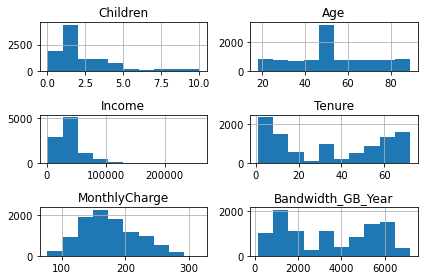

In [132]:
# Create histograms of important variables to understand dataset
df_curate[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.savefig('churn_histplot_md_pa.jpg')
plt.tight_layout()
# plt.close()

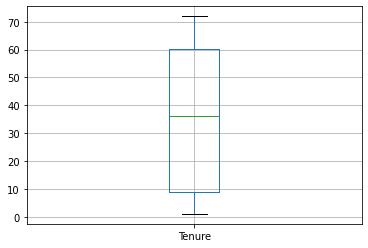

In [133]:
# Need to find out outliers with different statatics method
# Create a boxplot of user duration, payment & usage variables
df_curate.boxplot(['Tenure'])
plt.savefig('churn_boxplot_tenure_md_pa.jpg')
##this seems good

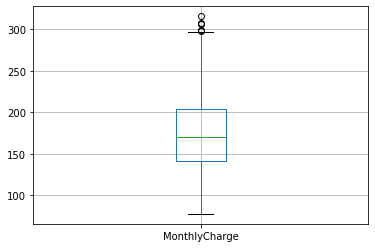

In [134]:
# Need to find out outliers with different statatics method
# Create a boxplot of user duration, payment & usage variables
df_curate.boxplot(['MonthlyCharge'])
plt.savefig('churn_boxplot_monthlycharge_md_pa.jpg')
plt.show()
##Has few outlier in data

D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


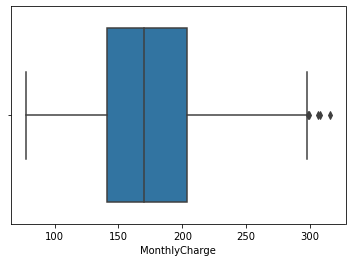

In [135]:
# Examine with Seaborn boxplot 
# It has outlier in dataset
sns.boxplot('MonthlyCharge', data = df_curate)
plt.show()


### Save curated or clean data to new dataset

In [136]:
# Write Clean data to new dataset file
df_curate.to_csv('churn_clean_curated.csv')

In [137]:
# read curated or clean data & remove all variable except user services payment info and survey data
churn_data = pd.read_csv('churn_clean_curated.csv')

In [138]:
# Get last eleven service realted variables
data = churn_data.loc[:,'Tenure':'Active_Listening']
data.head(2)

,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Responses,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4


D:\Users\milan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


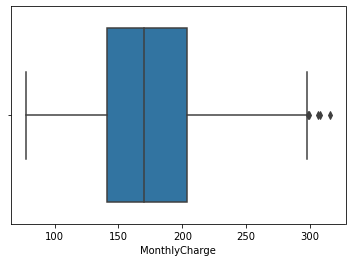

In [139]:
# We have identify the oultier in data with help of statatics
#with Seaborn boxplot.It has outlier in dataset
sns.boxplot('MonthlyCharge', data = df_curate)
plt.show()


In [140]:
# Now its time determine outlier with the standard deviation 
#of numeric columns
outlier = []
mean = np.mean(df_curate['MonthlyCharge'])
std = np.std(df_curate['MonthlyCharge'])
for i in df_curate['MonthlyCharge']:
    z = (i-mean)/std
    if z > 3:
        outlier.append(i)
print('outlier in dataset is', outlier)
#data_mean = df_curate.mean()

outlier in dataset is [307.5281242, 315.8786, 306.268]


## <span style="color:blue">Principal Components Analysis (PCA) </span>

In [141]:
# Import Scikit Learn PCA application
from sklearn.decomposition import PCA

It is a common practice to normalize your data before feeding it to any machine learning algorithm.

In [142]:
# we need to normalize that data before calling PCA
normalized_data = (data - data.mean()) / data.std()
## print(normalized_data) --for testing

In [143]:
# Get list of all principal component of dataset 
pca = PCA(n_components = data.shape[1])
print(data.shape[1])
print(pca)

11
PCA(n_components=11)


In [144]:
# Create a list of PCA names based on our dataset columns including survey Item variables.
## PCA works with numeric columns
numeric_data = data[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Responses', 
                       'Timely_Fixes', 'Timely_Replacements', 'Reliability', 'Options', 
                       'Respectful_Response', 'Courteous_Exchange', 'Active_Listening']]
pcs_names = []
for i, col in enumerate(numeric_data.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


In [145]:
# Call PCA application & convert the dataset of 11 variables into a dataset of 11 components
pca.fit(normalized_data)
print(pca.fit(normalized_data))
churn_pca = pd.DataFrame(pca.transform(normalized_data),
                        columns = pcs_names)

PCA(n_components=11)


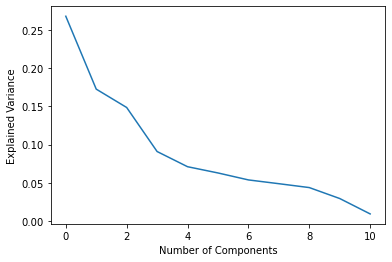

In [146]:
# Run the scree plot to understand PC in dataset.
#The explained variance ratio is the %age of variance that is 
#attributed by each of the selected components
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

In [147]:
# Calculate the eigenvalues 
#Measures how each variable is associated with one another using a Covariance matrix 
cov_matrix = np.dot(normalized_data.T, normalized_data) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) 
               for eigenvector in pca.components_]

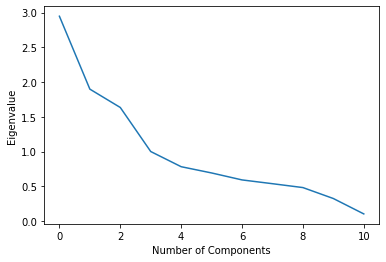

In [148]:
# Plot the eigenvalues as above
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

In [149]:
# Select the fewest components 
#The explained variance ratio is the %age of variance that is 
#attributed by each of the selected components
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.26792660623963116
PC2 0.4405373288022938
PC3 0.5891444522248597
PC4 0.6801579842425085
PC5 0.7513217054372499
PC6 0.8143117094101319
PC7 0.8681970531672317
PC8 0.9171387362588829
PC9 0.9610122820002187
PC10 0.990573636314483
PC11 0.9999999999999999


In [150]:
# Create a rotation 
#Rotations are done for the sake of interpretation of the extracted factors in factor analysis
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index = numeric_data.columns)
rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010403,0.701838,-0.072209,-0.063594,0.005683,-0.011155,0.007419,-0.011527,0.006935,0.003286,-0.705445
MonthlyCharge,0.000317,0.041147,-0.014151,0.996995,-0.022136,0.015231,-0.018038,-0.004316,0.023690,-0.013785,-0.047865
Bandwidth_GB_Year,-0.012166,0.703079,-0.074222,0.004399,0.009590,0.003466,0.003701,-0.002364,-0.008068,0.008529,0.706925
Timely_Responses,0.458932,0.031325,0.281154,0.018568,-0.070233,-0.119149,-0.045963,0.025431,-0.240574,0.793237,-0.004306
Timely_Fixes,0.434134,0.042559,0.282404,0.007508,-0.106632,-0.169752,-0.065414,0.074400,-0.592131,-0.573832,-0.002217
Timely_Replacements,0.400639,0.034665,0.281118,-0.019631,-0.173742,-0.255336,-0.146887,-0.396333,0.673088,-0.177665,0.014933
Reliability,0.145799,-0.050367,-0.567815,-0.010310,-0.171334,-0.483328,-0.443353,0.431528,0.087207,0.018301,0.002283
Options,-0.175633,0.066334,0.587335,-0.000047,0.135949,0.060124,-0.209767,0.693861,0.265474,-0.042012,-0.002514
Respectful_Response,0.405207,-0.012680,-0.183447,0.004596,-0.062342,0.064609,0.757954,0.402835,0.230319,-0.063972,0.001604
Courteous_Exchange,0.358342,-0.003886,-0.181697,-0.027959,-0.182406,0.806166,-0.379136,0.067889,0.067293,-0.040946,-0.006875


In [151]:
# loadings the output  for components
#loadings has been used to indicate the PCs coefficients. 
#it used to indicate the coefficients multiplied by the sqrt of the eigenvalues of the matrix. 
loadings = pd.DataFrame(pca.components_.T,columns = pcs_names,index = data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010403,0.701838,-0.072209,-0.063594,0.005683,-0.011155,0.007419,-0.011527,0.006935,0.003286,-0.705445
MonthlyCharge,0.000317,0.041147,-0.014151,0.996995,-0.022136,0.015231,-0.018038,-0.004316,0.023690,-0.013785,-0.047865
Bandwidth_GB_Year,-0.012166,0.703079,-0.074222,0.004399,0.009590,0.003466,0.003701,-0.002364,-0.008068,0.008529,0.706925
Timely_Responses,0.458932,0.031325,0.281154,0.018568,-0.070233,-0.119149,-0.045963,0.025431,-0.240574,0.793237,-0.004306
Timely_Fixes,0.434134,0.042559,0.282404,0.007508,-0.106632,-0.169752,-0.065414,0.074400,-0.592131,-0.573832,-0.002217
Timely_Replacements,0.400639,0.034665,0.281118,-0.019631,-0.173742,-0.255336,-0.146887,-0.396333,0.673088,-0.177665,0.014933
Reliability,0.145799,-0.050367,-0.567815,-0.010310,-0.171334,-0.483328,-0.443353,0.431528,0.087207,0.018301,0.002283
Options,-0.175633,0.066334,0.587335,-0.000047,0.135949,0.060124,-0.209767,0.693861,0.265474,-0.042012,-0.002514
Respectful_Response,0.405207,-0.012680,-0.183447,0.004596,-0.062342,0.064609,0.757954,0.402835,0.230319,-0.063972,0.001604
Courteous_Exchange,0.358342,-0.003886,-0.181697,-0.027959,-0.182406,0.806166,-0.379136,0.067889,0.067293,-0.040946,-0.006875
